### МГУ им. М. В. Ломоносова
### Введение в анализ геоданных
#### [Материалы курса](https://github.com/keyonix/course_geodata)
## Python для анализа данных - Решение практической задачи анализа данных в Python

In [3]:
import numpy as np  # импорт модуля Numpy
import pandas as pd  # импорт модуля Pandas
from matplotlib import pyplot as plt  # импорт инструментов визуализации
from mpl_toolkits.mplot3d import Axes3D  # импорт дополнительной функциональности для построения 3D графиков
import seaborn as sns # импорт пакета Seaborn дял визуализации

%matplotlib inline

In [5]:
df = pd.read_csv('data/data.csv', sep=',') # получение данных из файла

In [6]:
# Создание словаря с полными названиями показателей
feature_names = {
    'skv': 'Drill Id',
    'X': 'X',
    'Y': 'Y',
    'Z': 'Z',
    'H':'Depth, m',
    'Ip':'Plasticity index, %',
    'Il':'Liquidity index, dimensionless unit',
    'W':'Water content, %',
    'r':'Soil density, g/cm3',
    'rs':'Solid particles density, g/cm3',
    'e':'Void ratio, dimensionless unit',
    'WL':'Liquid limit, %',
    'Wp':'Plastic limit, %',\
    'jn':'Angle of internal friction (natural water content), degree',
    'E12mk.w':'Modulus of deformation (water-saturated soil), MPa',
    'jw':'Angle of internal friction (water-saturated soil), degree',
    'rd':'Dry soil density, g/cm3',\
    'd0.3':'Collapse potentional, dimensionless unit',
    'cluster' : 'Age',
    'qname' : 'Genesis'
}

### Описательный анализ

In [7]:
df.head(3)

,skv,X,Y,Z,H,Ip,Il,W,r,rs,e,WL,Wp,jn,E12mk.w,jw,rd,d0.3,cluster,qname
0,25,472959.832133,89880.697030,16.85,4.0,3.95,-1.85,8.80,1.84,2.67,0.579,20.06,16.11,NaN,15.68,22.78,1.69,0.064,Q,L.epIII-H
1,20,473110.225100,89866.519359,12.10,6.0,3.38,-1.79,10.50,1.79,2.67,0.648,19.92,16.54,NaN,15.82,23.27,1.62,0.038,Q,L.epIII-H
2,18,472997.786596,89870.103594,13.32,7.0,4.62,-1.46,9.59,1.79,2.67,0.635,20.96,16.34,NaN,14.84,27.33,1.63,0.034,Q,L.epIII-H


In [8]:
print('Размерность данных: количество строк - {0}, количество колонок - {1}'.format(df.shape[0], df.shape[1]))

Размерность данных: количество строк - 3839, количество колонок - 20


In [9]:
print('Описательная статистика данных:')
df.describe()

Описательная статистика данных:


,X,Y,Z,H,Ip,Il,W,r,rs,e,WL,Wp,jn,E12mk.w,jw,rd,d0.3
count,3839.000000,3839.000000,3839.000000,3839.000000,3818.000000,3595.000000,3800.000000,2789.000000,2831.000000,2729.000000,3615.000000,3594.000000,255.000000,180.000000,160.000000,2756.00000,120.000000
mean,464503.412003,89797.255856,27.982769,7.738776,17.059791,-0.062749,22.706308,1.909909,2.729893,0.790940,41.658304,23.200701,19.060549,16.590404,19.036938,1.55867,0.021100
std,4032.294577,298.180570,14.741396,7.212860,9.259444,0.396511,12.195723,0.143442,0.040193,0.302026,15.142534,7.735520,5.466760,5.120645,5.732210,0.20243,0.021737
min,460203.978933,89215.968625,-19.210000,0.000000,0.000010,-4.330000,0.000000,1.000000,2.430000,0.224000,15.200000,11.300000,5.090000,4.300000,0.000000,0.77000,0.001000
25%,461131.647213,89548.071170,17.050000,2.800000,12.000000,-0.257260,15.500000,1.820000,2.700000,0.609000,31.400000,18.410000,15.755000,12.694494,15.640000,1.48000,0.005000
50%,463063.185178,89789.890606,28.340000,5.200000,15.390000,-0.014925,19.085000,1.930000,2.720000,0.691000,36.300000,20.740000,20.180000,17.364190,19.295000,1.61000,0.016000
75%,466191.931108,89947.685289,36.595000,9.900000,21.937500,0.190000,26.100000,2.010000,2.750000,0.860000,48.395000,25.000000,23.270000,20.398155,23.030000,1.69000,0.029500
max,473260.081861,90462.665472,85.000000,45.000000,69.320000,1.198148,89.000000,2.410000,2.960000,2.572000,116.670000,84.600000,29.250000,27.766976,48.000000,2.20000,0.140000


In [10]:
na_values = []
for col in feature_names.keys():
    na_values.append(df[df[col].isnull()].shape[0])
print('Количество пропущенных значений по каждаму показателю:')
pd.DataFrame({'Имя колонки':list(feature_names.values()), 
              'Количество пропущеных значений': na_values,
              'Количество посчитаных значений': df.shape[0] - np.array(na_values)}) \
            .sort_values('Количество пропущеных значений', ascending=False)

Количество пропущенных значений по каждаму показателю:


,Имя колонки,Количество посчитаных значений,Количество пропущеных значений
17,"Collapse potentional, dimensionless unit",120,3719
15,Angle of internal friction (water-saturated so...,160,3679
14,"Modulus of deformation (water-saturated soil),...",180,3659
13,Angle of internal friction (natural water cont...,255,3584
18,Age,2718,1121
10,"Void ratio, dimensionless unit",2729,1110
16,"Dry soil density, g/cm3",2756,1083
8,"Soil density, g/cm3",2789,1050
9,"Solid particles density, g/cm3",2831,1008
12,"Plastic limit, %",3594,245


In [22]:
coordinates = df[['X', 'Y']].drop_duplicates()
print('Количество уникальных расположений:', coordinates.shape[0])
print('Количество уникальных ID скважин:', df['skv'].unique().shape[0])
print('Среднее количество образцов на 1 уникальный ID скважины:', round(df['skv'].value_counts().mean()))

Количество уникальных расположений: 981
Количество уникальных ID скважин: 914
Среднее количество образцов на 1 уникальный ID скважины: 4


In [23]:
print('Статистика по образцам на 1 уникальный ID скважины:')
print(df['skv'].value_counts().describe())

Статистика по образцам на 1 уникальный ID скважины:
count    914.000000
mean       4.200219
std        3.557440
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       28.000000
Name: skv, dtype: float64


### Ислледование и визуализация данных 

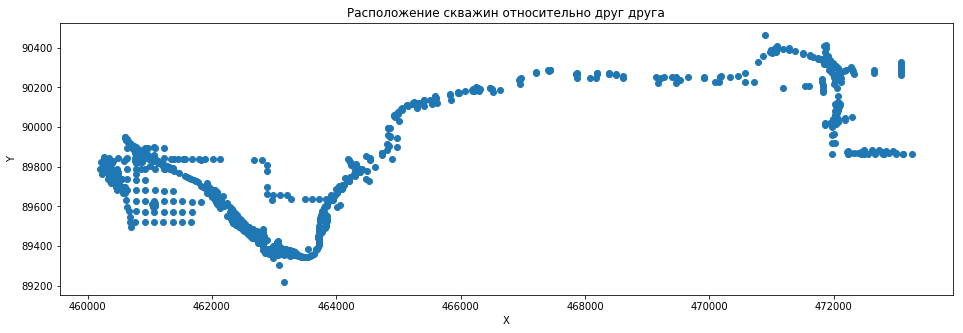

In [10]:
plt.figure(figsize=(16,5))
plt.plot(coordinates['X'], coordinates['Y'], 'o')
plt.title('Расположение скважин относительно друг друга')
plt.xlabel(feature_names['X'])
plt.ylabel(feature_names['Y'])
plt.show()

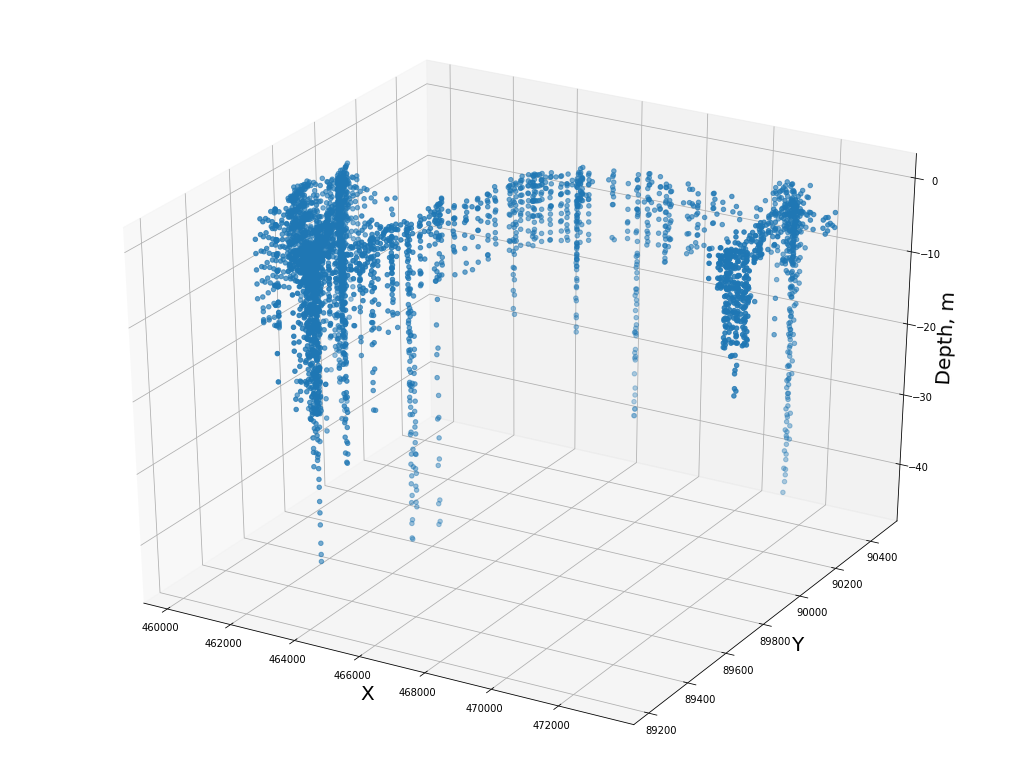

In [11]:
fig = plt.figure(figsize=(18,14))  # установка размера рамки графика
ax = fig.add_subplot(111, projection='3d')  # создание 3D рамки
ax.scatter(df['X'], df['Y'], -df['H'], marker='o')  # создание 3D диаграммы рассеяния с явным указанием типа графика и названия графика для отображения в легенде
ax.set_xlabel(feature_names['X'], fontsize=20)  # подпись оси x с явным указанием размера шрифта
ax.set_ylabel(feature_names['Y'], fontsize=20)  # подпись оси y с явным указанием размера шрифта
ax.set_zlabel(feature_names['H'], fontsize=20)  # подпись оси z с явным указанием размера шрифта
ax.legend()  # создание легенды с названиями элементов графика
plt.show()  # отображение графика

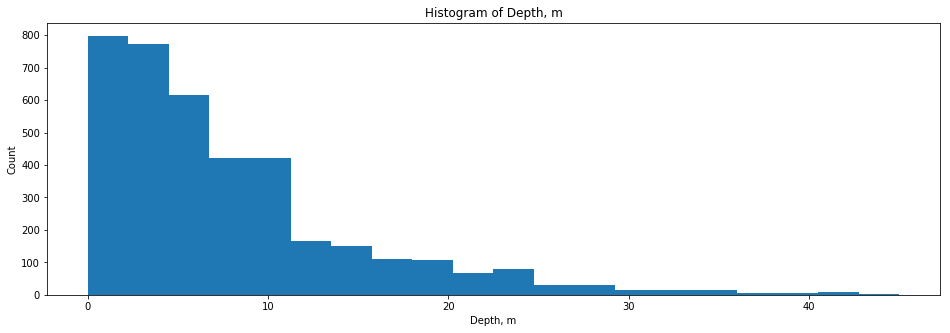

In [12]:
plt.figure(figsize=(16,5))
plt.hist(df['H'], bins=20)
plt.title('Histogram of %s' % feature_names['H'])
plt.xlabel(feature_names['H'])
plt.ylabel('Count')
plt.show()

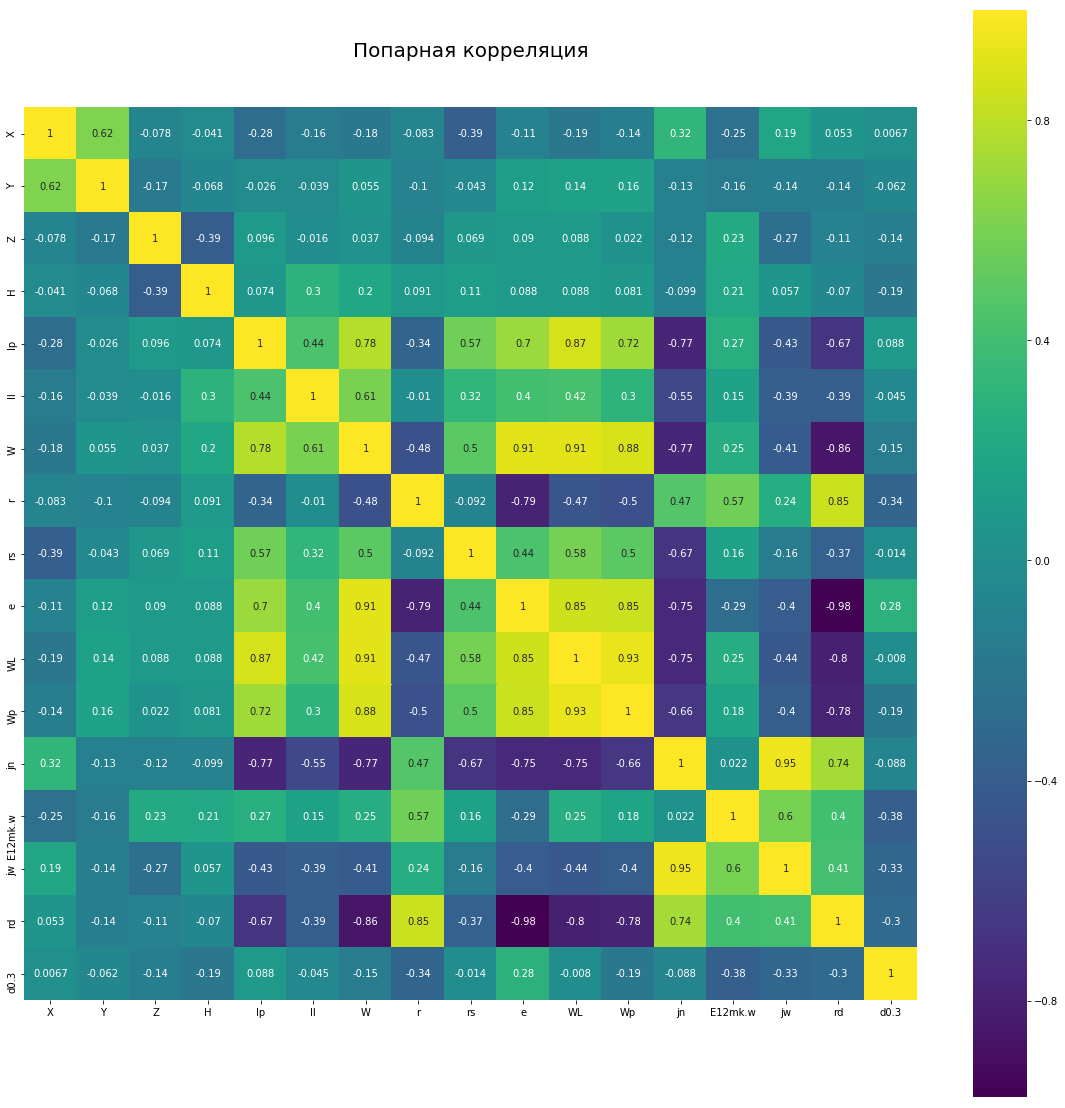

In [64]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Попарная корреляция', y=1.05, size=20)
sns.heatmap(df.corr(), square=True, annot=True, cmap=colormap)
plt.show()

In [88]:
# Диаграммы рассеяния для тех пар показателей, у которых высокая степень корреляции или антикорреляции
df_corr = df.corr().unstack().reset_index()
high_corr_features = df_corr[(np.abs(df_corr[0]) > 0.75) & (df_corr['level_0'] != df_corr['level_1'])].values

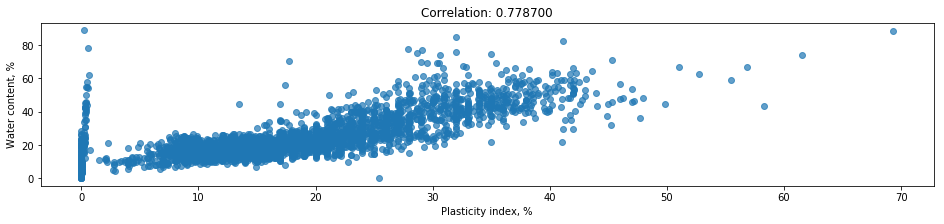

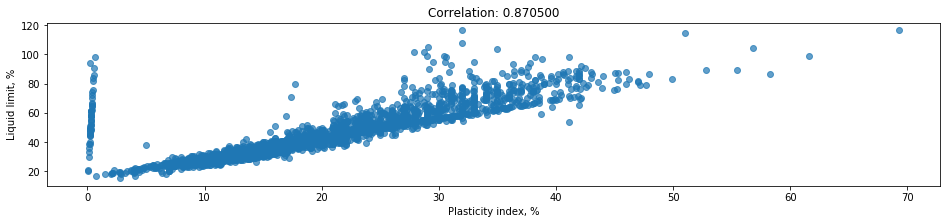

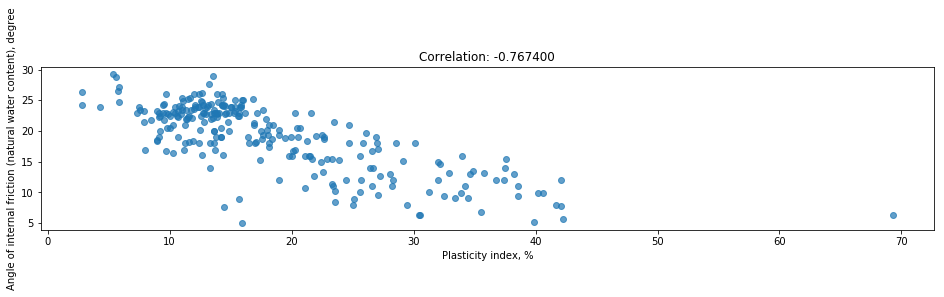

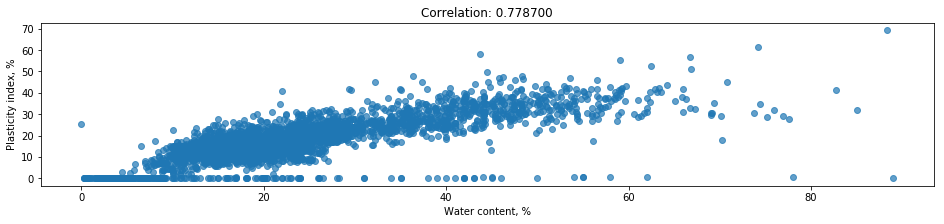

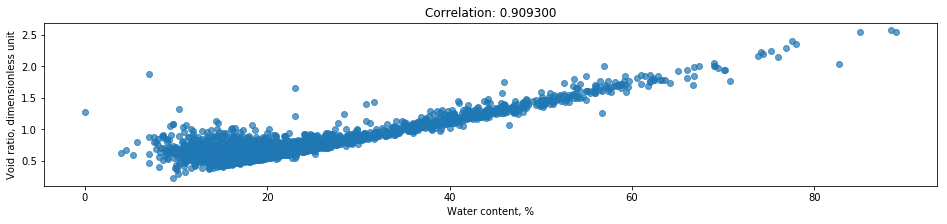

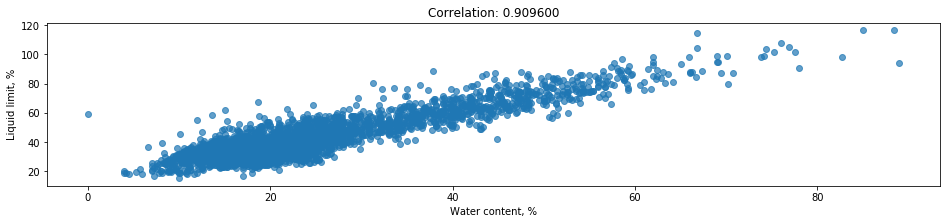

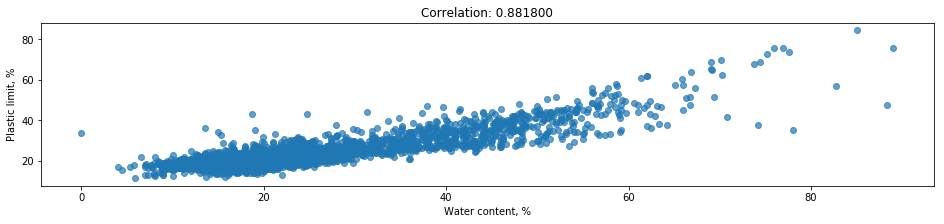

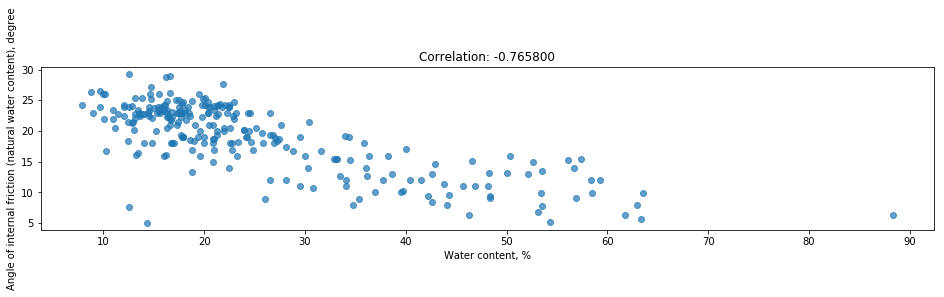

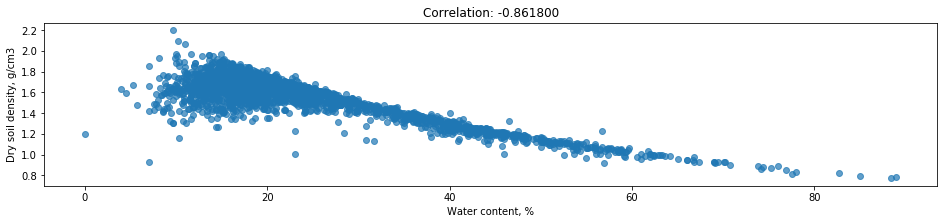

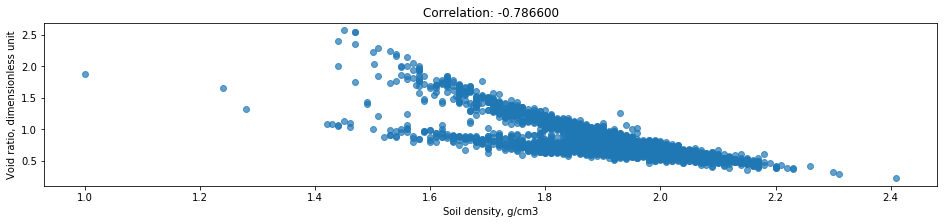

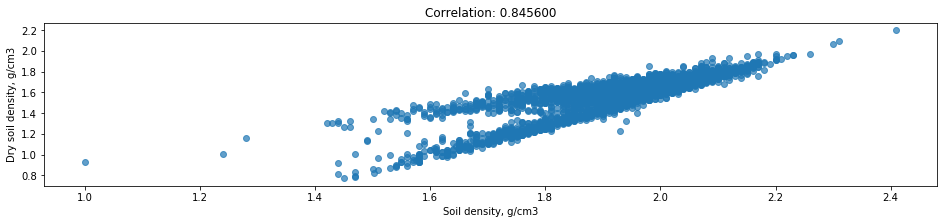

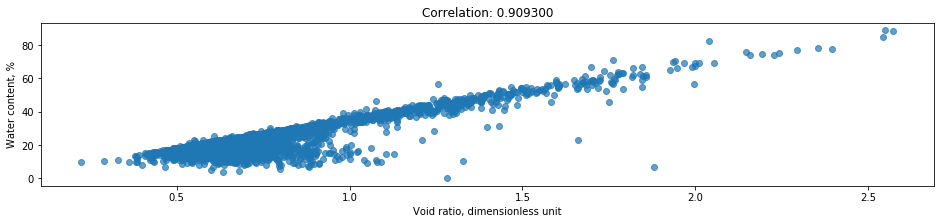

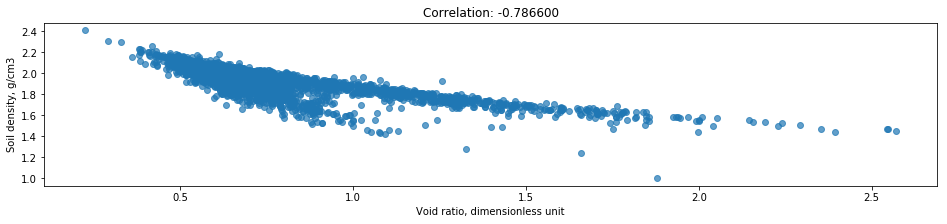

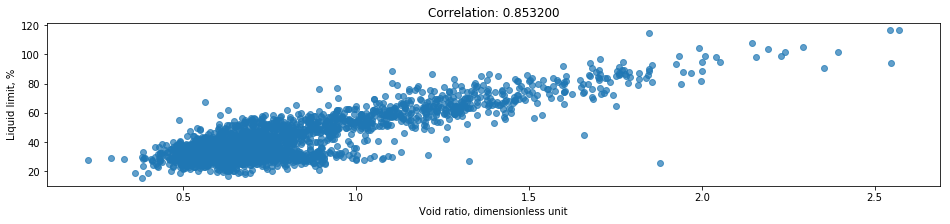

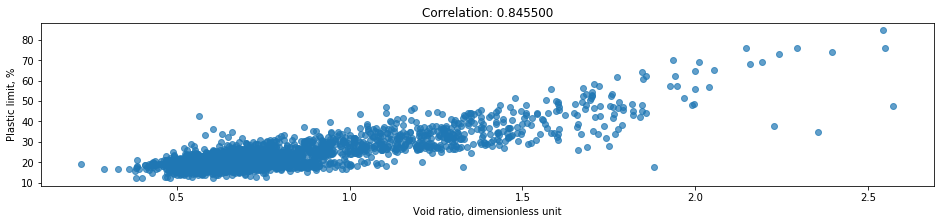

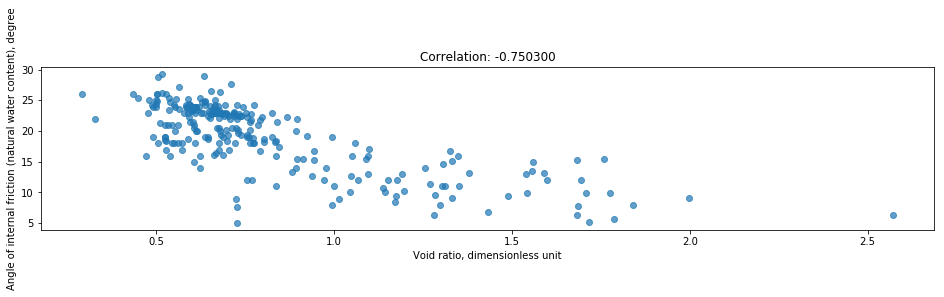

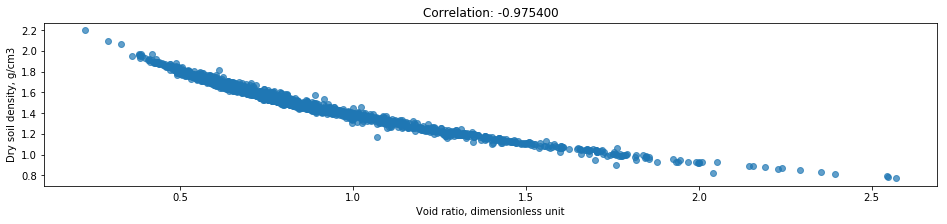

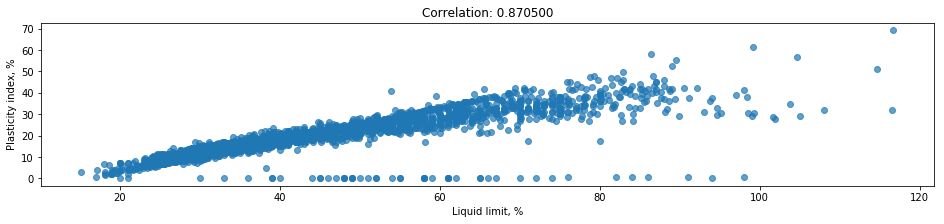

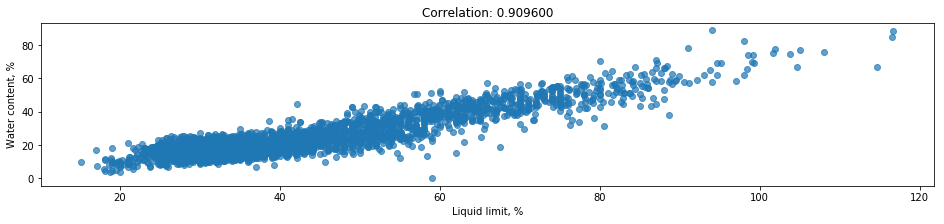

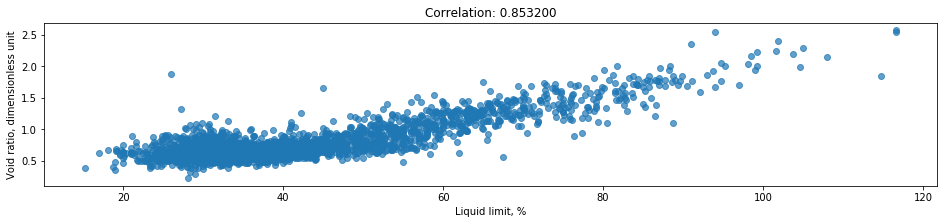

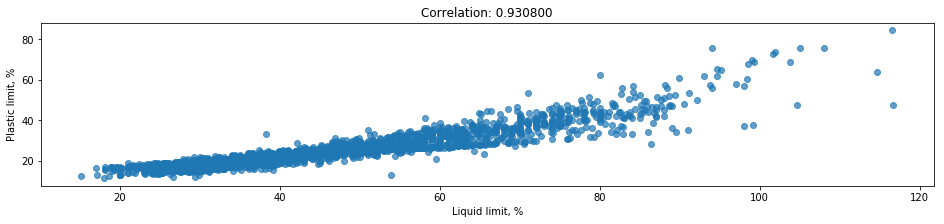

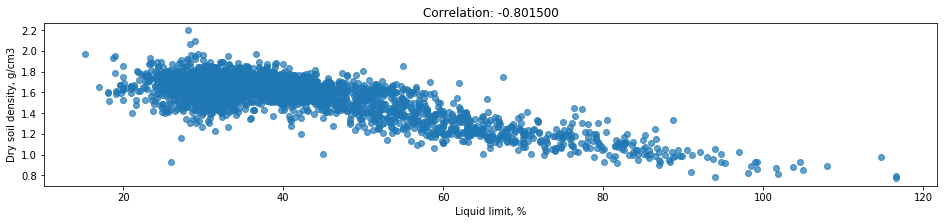

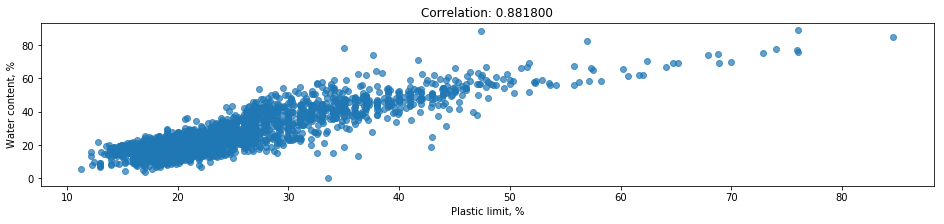

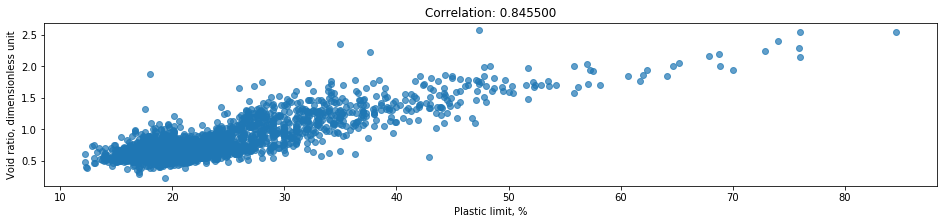

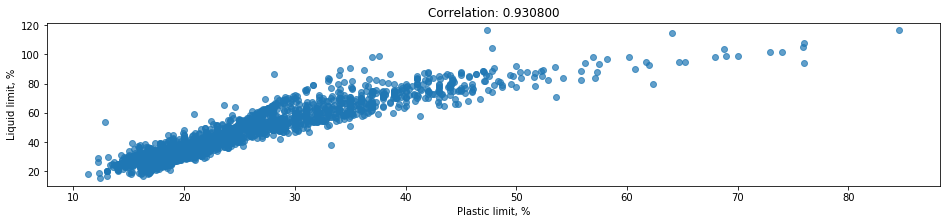

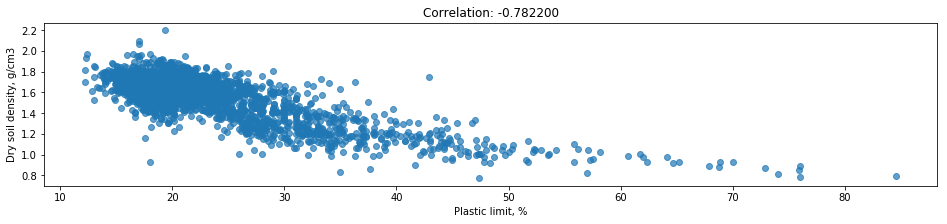

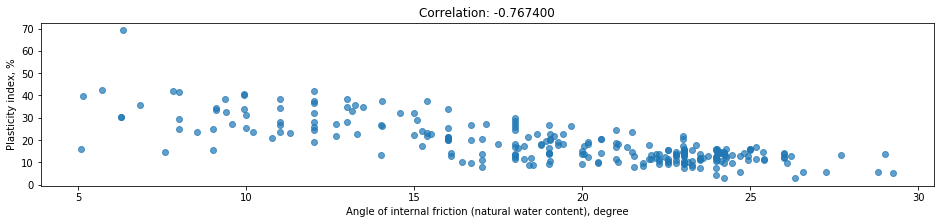

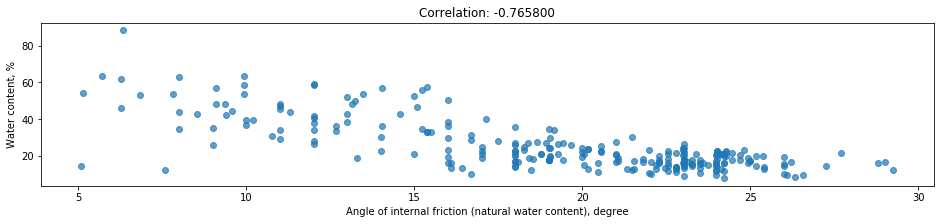

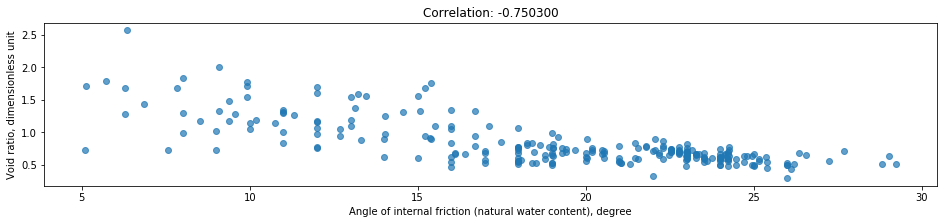

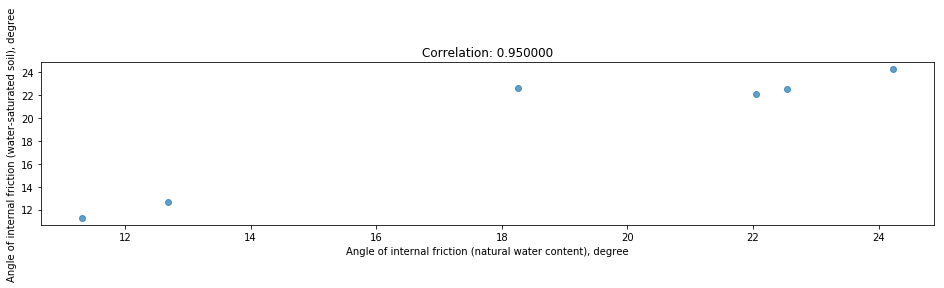

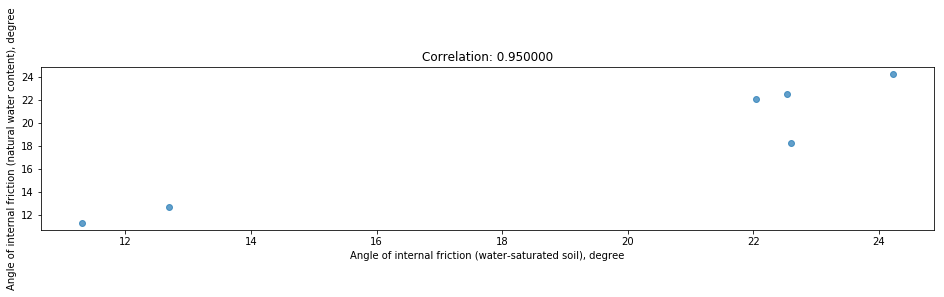

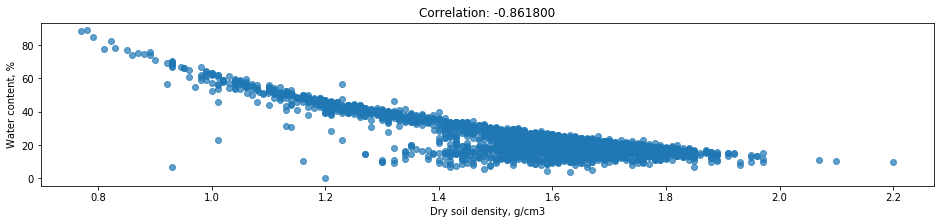

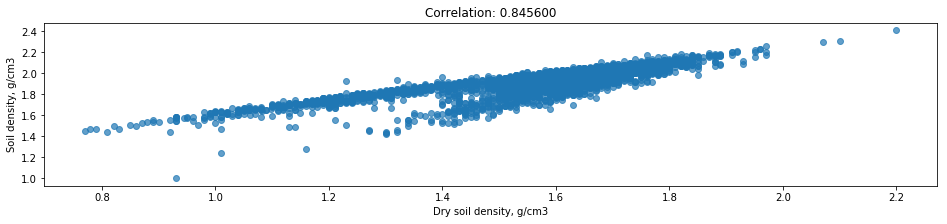

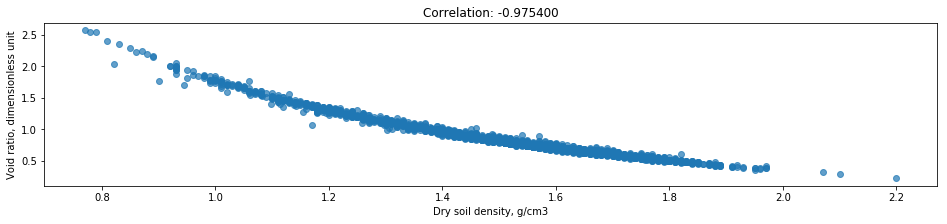

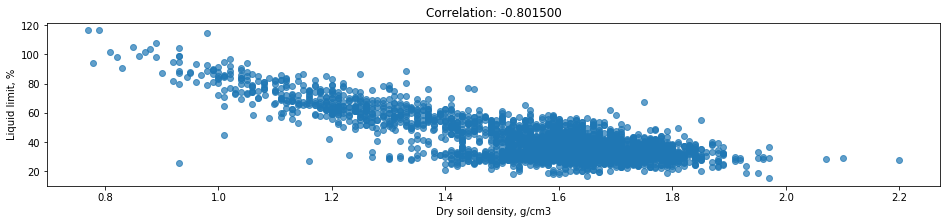

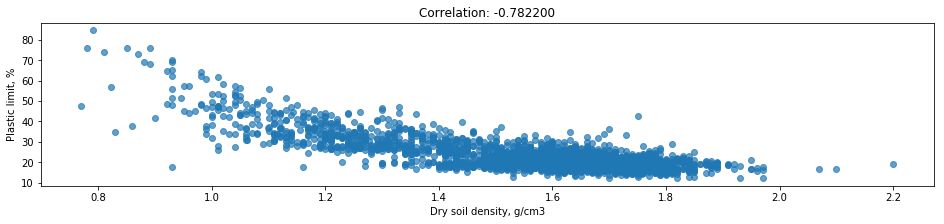

In [15]:
for feature_pair in high_corr_features:
    plt.figure(figsize=(16,3))
    plt.plot(df[feature_pair[0]], df[feature_pair[1]], 'o', alpha=0.7)
    plt.title('Correlation: %f' % round(feature_pair[2], 4))
    plt.xlabel(feature_names[feature_pair[0]])
    plt.ylabel(feature_names[feature_pair[1]])
    plt.show()

### Сравнительный анализ по категориальным переменным

In [94]:
# Убираем пустые значения в категориальной переменной, характеризующей принадлежность 
# грунтов к глобальному возрасту
df_clust = df[pd.notnull(df['cluster'])]

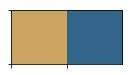

In [95]:
# Создаем палетку для визуализации двух основных кластеров грунтов
q_n_palette = ['#cba560', '#31668a'] ##'Q':'#cba560', 'N':'#31668a'
sns.set_palette(q_n_palette)
sns.palplot(sns.color_palette())

Text(0.5,6.8,'Age')

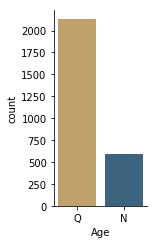

In [96]:
# Оцениваем сбалансированность выборки
sns.factorplot("cluster",data=df_clust, kind="count", size=3.5, aspect=0.6)
plt.xlabel(feature_names['cluster'])

Text(3.675,0.5,'Liquid limit, %')

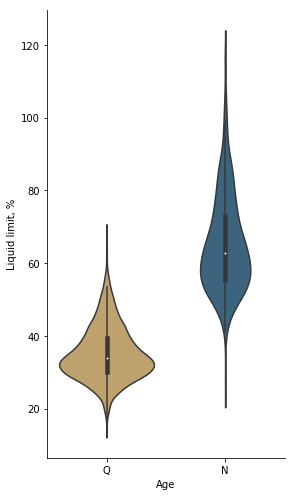

In [97]:
# Визуализируем сравнительный разброс значений в пределах каждого возраста по 
# единичному показателю свойств грунтов (WL)
vp=sns.factorplot(x="cluster", y="WL", data=df_clust,  
                  size=7, aspect=0.6, kind="violin",
                  orient='v',
                  palette=q_n_palette)
plt.xlabel(feature_names['cluster'])
plt.ylabel(feature_names['WL'])
#plt.ylim(15, 90)

In [98]:
# Убираем пустые значения в категориальной переменной, характеризующей принадлежность 
# грунтов к четвертичному возрасту и уникальный генезис
df_clust_q = df[pd.notnull(df['qname'])]

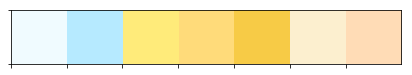

In [99]:
# Создаем палетку для визуализации 7 наиболее распространенных гинетических типов грунтов для четвертичного возраста
q_palette = ['#f0fbff','#b6eaff', '#ffeb7a', '#ffdb7a', '#f7cb46', '#fcefcf', '#ffdcb6']
sns.set_palette(q_palette)
sns.palplot(sns.color_palette())

Text(0.5,6.8,'Genesis')

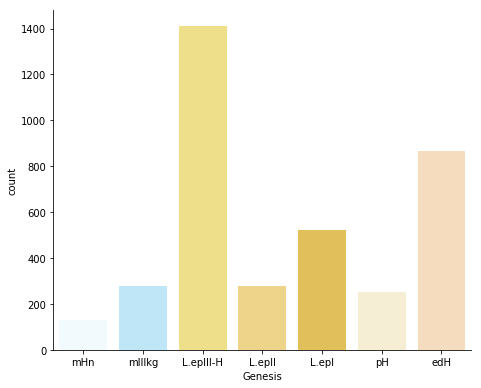

In [103]:
# Оцениваем сбалансированность выборки
sns.factorplot("qname",data=df_clust_q, 
               order=['mHn','mIIIkg','L.epIII-H', 'L.epII','L.epI', 'pH','edH'],
               kind="count", size=5.5, aspect=1.2)
plt.xlabel(feature_names['qname'])

Text(10.05,0.5,'Plasticity index, %')

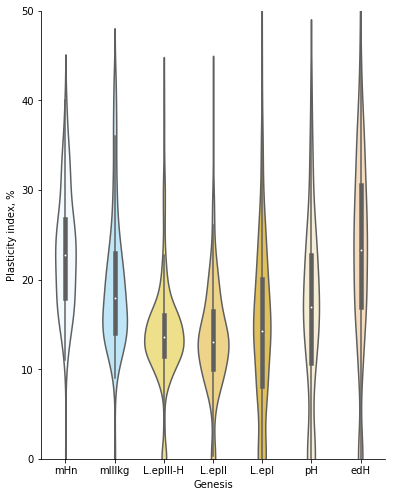

In [102]:
# Визуализируем сравнительный разброс значений в пределах каждого генетического типа по 
# единичному показателю свойств грунтов (Ip)
vp=sns.factorplot(x="qname", y="Ip", data=df_clust_q, 
                  order= ['mHn','mIIIkg','L.epIII-H', 'L.epII','L.epI', 'pH','edH'], 
                  size=7, aspect=0.8, kind="violin",
                  orient='v',
                  palette=q_palette)
plt.ylim(0, 50)
plt.xlabel(feature_names['qname'])
plt.ylabel(feature_names['Ip'])